In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from model_trainning import datapreprocess,datacut

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df1=pd.read_csv('data//steam.csv')[['appid','name','release_date','genres']]
df2=pd.read_csv('data//steam_description_data.csv').rename(columns={'steam_appid':'appid'})[['appid','detailed_description']]
df=pd.merge(df1,df2,on='appid')

In [4]:
def get_bar(data,genres):
    game_type_count=[]
    for i in genres:
        game_type_count.append((i,data[i].sum()))

    game_type_count.sort(key=lambda score: score[1])

    x=[genre[0] for genre in game_type_count]
    y=[total_game[1] for total_game in game_type_count]
    plt.figure(figsize=(10,10))
    plt.barh(x,y,label="Total Games")
    data_long=len(data)
    for x,y in zip(y,x): 
        plt.text(x+data_long/35,    
                y,
                x,   
                ha='center',   
                va='center')  
    plt.xlim((0,data_long))
    plt.legend(loc="upper right")
    plt.show()

def words_bar(data):
    words_count=data.detailed_description.apply(lambda x : len(x.split(' ')))
    plt.figure(figsize=(10,6))
    plt.hist(words_count, bins = range(0,8500,250), density=False, cumulative = False, label = "games_count")
    plt.legend()
    plt.xlabel('words')
    plt.xticks(range(0,8500,1000))
    plt.show()

In [5]:
preprocess=datapreprocess(df)
df_data=preprocess.text_process()
genres=preprocess.feature_get()

In [11]:
data_cut=datacut(df_data)
df_test,df_train=data_cut.time_cut()

## 在訓練集中，不同標籤的分佈情況

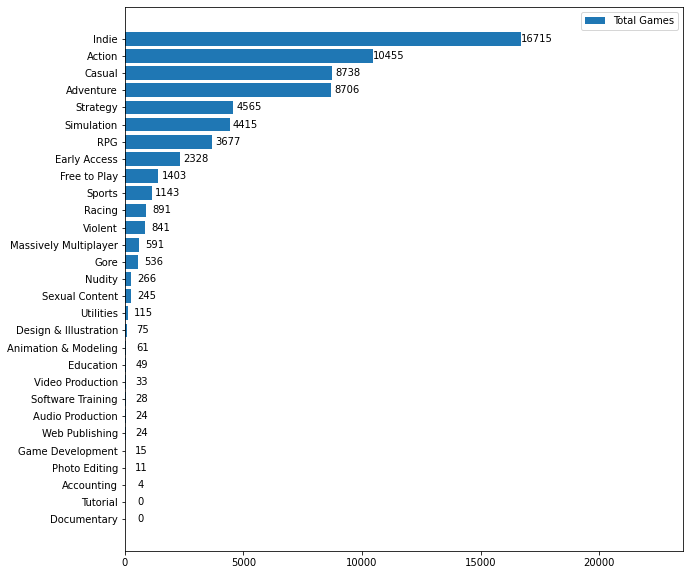

In [12]:
get_bar(df_train,genres)

## 在測試集中，不同標籤的分佈情況

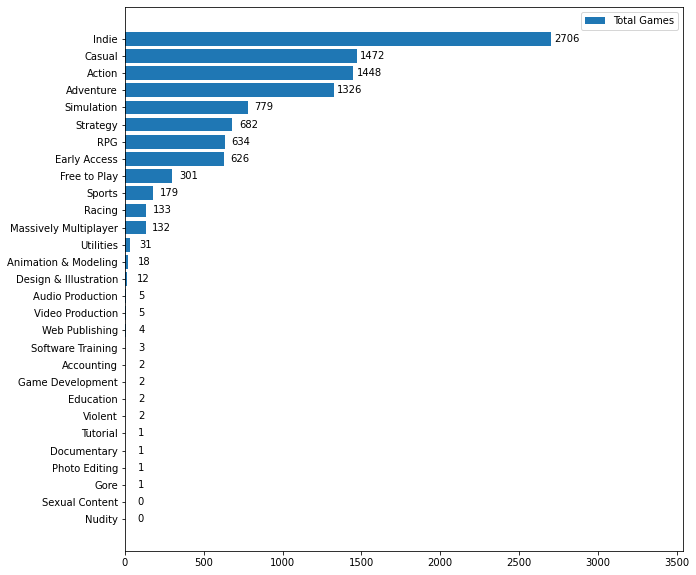

In [13]:
get_bar(df_test,genres)

## 在訓練集中，遊戲介紹的字數在所有遊戲的分佈

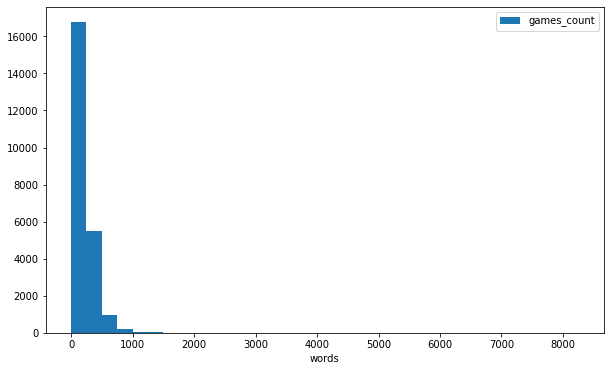

In [14]:
words_bar(df_train)

## 在測試集中，遊戲介紹的字數在所有遊戲的分佈

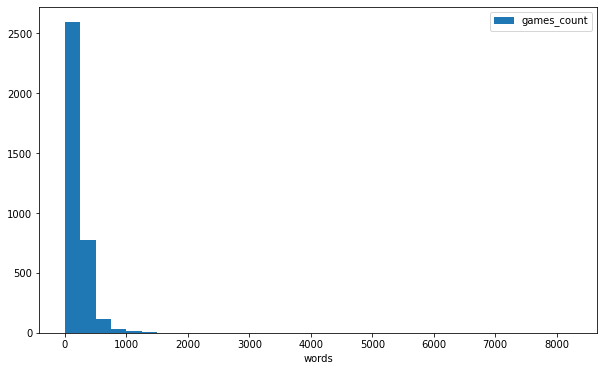

In [15]:
words_bar(df_test)